In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#Data preparation

In [ ]:
from google.colab import files
df = files.upload()

Saving Train_psolI3n.csv to Train_psolI3n.csv


In [ ]:
df=pd.read_csv('Train_psolI3n.csv')

In [ ]:
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [ ]:
df.shape

(68353, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#Exploraty data analysis

In [ ]:
df.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum().sort_values(ascending=False)

Customer_Location            11595
Total_Past_Communications     6825
Total_Links                   2201
Total_Images                  1677
Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Email_Campaign_Type              0
Time_Email_sent_Category         0
Word_Count                       0
Email_Status                     0
dtype: int64

In [ ]:
# Mengisi nilai yang hilang dengan modus untuk 'Customer_Location' karena ini adalah data kategori
df['Customer_Location'].fillna(df['Customer_Location'].mode()[0], inplace=True)  #df['Customer_Location'].mode()[0]: Menghitung modus (nilai yang paling sering muncul) dari kolom Customer_Location,inplace true artinya perubahan akan disimpan langsung ke dalam dataframe tanpa harus membuat variabel baru

# Mengisi nilai yang hilang dengan median untuk kolom numerik
df['Total_Past_Communications'].fillna(df['Total_Past_Communications'].median(), inplace=True)
df['Total_Links'].fillna(df['Total_Links'].median(), inplace=True)
df['Total_Images'].fillna(df['Total_Images'].median(), inplace=True)

# Menghitung jumlah nilai yang hilang (missing values) untuk setiap kolom di DataFrame df.
print(df.isnull().sum())

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64


Data outlier:
Subject_Hotness_Score          247
Email_Source_Type                0
Email_Campaign_Type              0
Total_Past_Communications      136
Word_Count                       0
Total_Links                   1608
Total_Images                  5585
Email_Status                 13412
dtype: int64


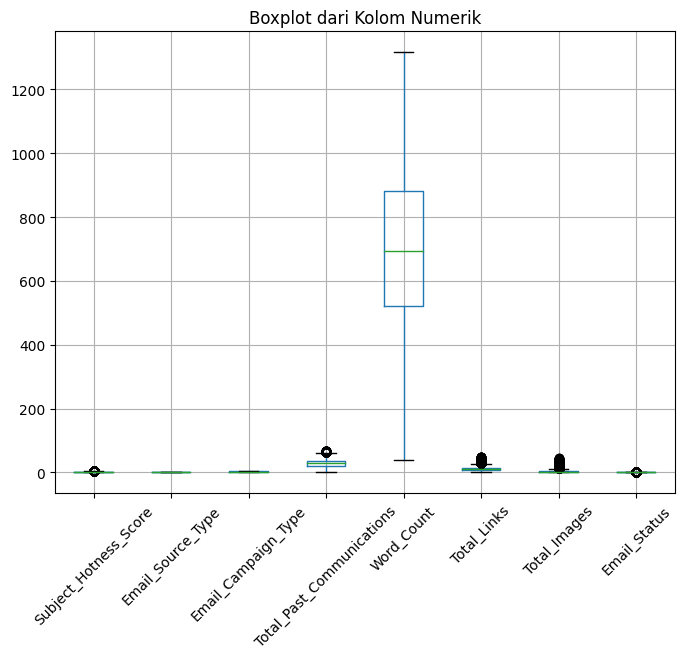

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Daftar kolom yang memiliki nilai numerik
numeric_col = ['Subject_Hotness_Score', 'Email_Source_Type', 'Email_Campaign_Type', 'Total_Past_Communications',
               'Word_Count', 'Total_Links', 'Total_Images', 'Email_Status']

# Menghitung Q1, Q2, dan Q3 dan IQR pada kolom numerik
Q1 = df[numeric_col].quantile(0.25)
Q3 = df[numeric_col].quantile(0.75)
IQR = Q3 - Q1

# Menentukan outlier
outliers = ((df[numeric_col] < (Q1 - 1.5 * IQR)) | (df[numeric_col] > (Q3 + 1.5 * IQR))).sum()

print('Data outlier:')
print(outliers)

# Visualisasi dengan boxplot
plt.figure(figsize=(8,6))
df[numeric_col].boxplot()
plt.title('Boxplot dari Kolom Numerik')
plt.xticks(rotation=45) #memutar sumbu x 45 derajat
plt.show()

Data outlier setelah mengganti dengan Q1 dan Q3:
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64


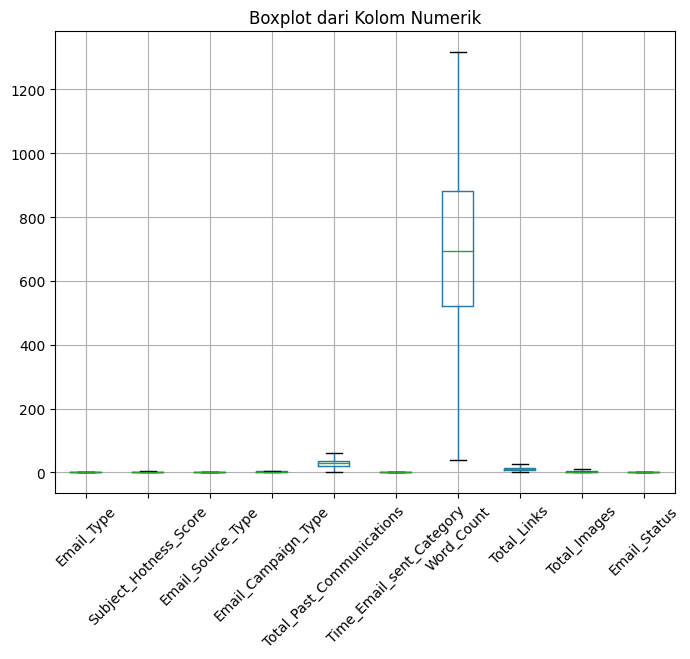

In [ ]:

#karena jumlah outlier yang terlalu banyak maka outlier yang ada saya isi dengan Q1 dan Q3

#  Membuat salinan dari DataFrame df dan menyimpannya dalam variabel df_outliers_replaced agar tidak mengubah data asli.
df_outliers_replaced = df.copy()

for col in numeric_col: #Mengiterasi setiap kolom dalam numeric_col dan menyimpan nya ke dalam variabel col
    Q1 = df_outliers_replaced[col].quantile(0.25) #Menghitung kuartil pertama (Q1) untuk kolom col.
    Q3 = df_outliers_replaced[col].quantile(0.75) #Menghitung kuartil ketiga (Q3) untuk kolom col.
    IQR = Q3 - Q1  #Menghitung rentang interkuartil (IQR).
    lower_bound = Q1 - 1.5 * IQR #Menghitung batas bawah untuk mendeteksi outlier.
    upper_bound = Q3 + 1.5 * IQR #Menghitung batas atas untuk mendeteksi outlier.

    df_outliers_replaced[col] = np.where(df_outliers_replaced[col] < lower_bound, Q1, df_outliers_replaced[col]) #Mengganti nilai di bawah batas bawah dengan Q1.
    df_outliers_replaced[col] = np.where(df_outliers_replaced[col] > upper_bound, Q3, df_outliers_replaced[col]) #Mengganti nilai di bawah batas atas dengan Q3.

# Memeriksa kembali jumlah outlier setelah mengganti dengan Q1 dan Q3
Q1 = df_outliers_replaced[numeric_col].quantile(0.25)
Q3 = df_outliers_replaced[numeric_col].quantile(0.75)
IQR = Q3 - Q1

outliers_replaced = ((df_outliers_replaced[numeric_col] < (Q1 - 1.5 * IQR)) | (df_outliers_replaced[numeric_col] > (Q3 + 1.5 * IQR))).sum()
print('Data outlier setelah mengganti dengan Q1 dan Q3:')
print(outliers_replaced)

# Visualisasi dengan boxplot
plt.figure(figsize=(8,6))
df_outliers_replaced[numeric_col].boxplot()
plt.title('Boxplot dari Kolom Numerik')
plt.xticks(rotation=45)
plt.show()

#data inshigt

##pengecekan apakah terdapat ditribusi yang tidak masuk akal

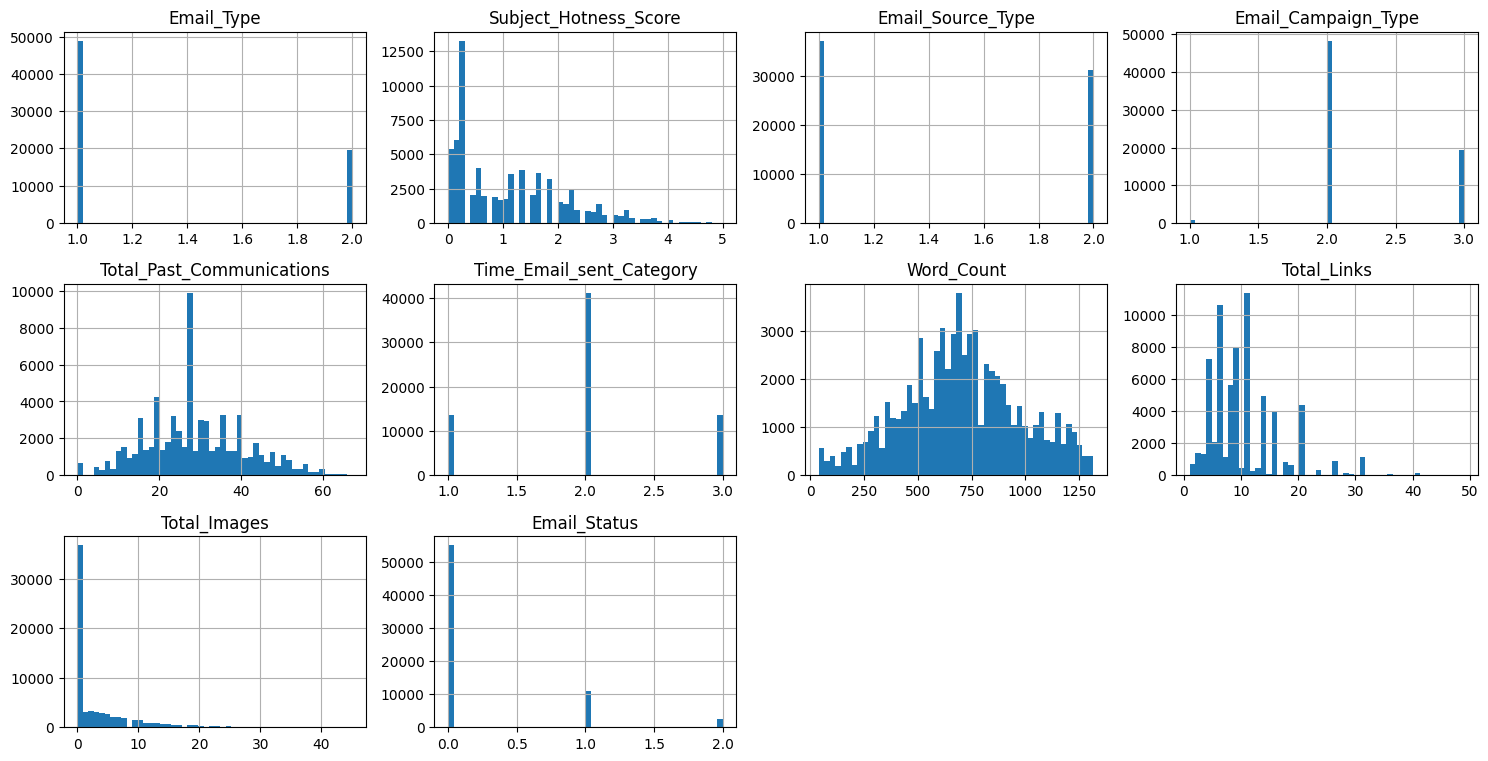

In [ ]:
# Memilih kolom-kolom dalam DataFrame df yang bertipe data float64 dan int64.
numeric_col = df.select_dtypes(include=['float64', 'int64']).columns

# Menampilkan histogram untuk setiap kolom numerik
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 10)) #Membuat figure dan grid subplot dengan 4 baris dan 4 kolom (total 16 subplot) dengan ukuran figure 15x10 inci.
axes = axes.flatten() #Mengubah array 2D axes menjadi array 1D untuk memudahkan iterasi.

for i, column in enumerate(numeric_col): # Mengiterasi setiap kolom dalam numeric_col, dengan i sebagai indeks dan column sebagai nama kolom.SSS
    df[column].hist(bins=50, ax=axes[i]) #Membuat histogram untuk kolom column dengan 50 bins, dan menampilkannya pada subplot axes[i].
    axes[i].set_title(column) #Memberi judul subplot dengan nama kolom.S

# Jika jumlah kolom numerik kurang dari jumlah subplot (16), matikan subplot yang kosong
for j in range(i + 1, len(axes)): # Mengiterasi sisa subplot yang tidak terisi, dimulai dari indeks i + 1 hingga jumlah total subplot (len(axes)).
    fig.delaxes(axes[j]) #Menghapus subplot kosong dari figure.

plt.tight_layout() #Mengatur tata letak subplot agar tidak saling tumpang tindih dan memiliki jarak yang rapi.
plt.show()

##future engineering

<Axes: xlabel='Email_Type', ylabel='Count'>

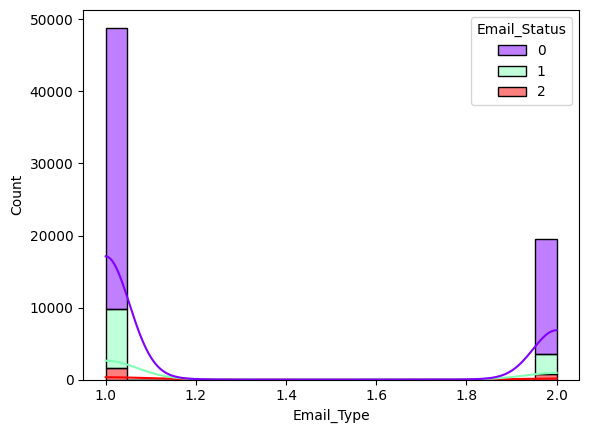

In [ ]:
sns.histplot(data=df, kde=True, x='Email_Type', hue='Email_Status', multiple='stack',palette='rainbow')

<Axes: xlabel='Subject_Hotness_Score', ylabel='Count'>

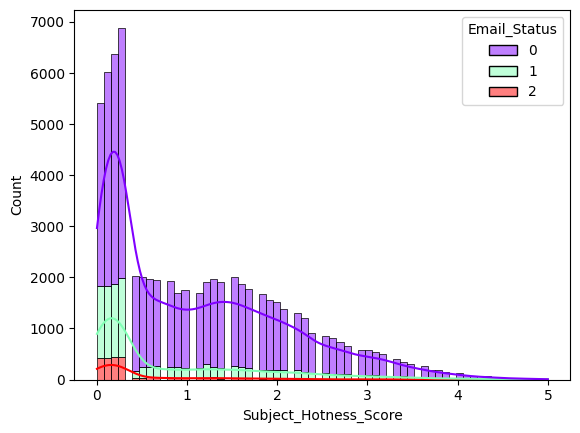

In [ ]:
sns.histplot(data=df, kde=True, x='Subject_Hotness_Score', hue='Email_Status', multiple='stack',palette='rainbow')

<Axes: xlabel='Email_Source_Type', ylabel='Count'>

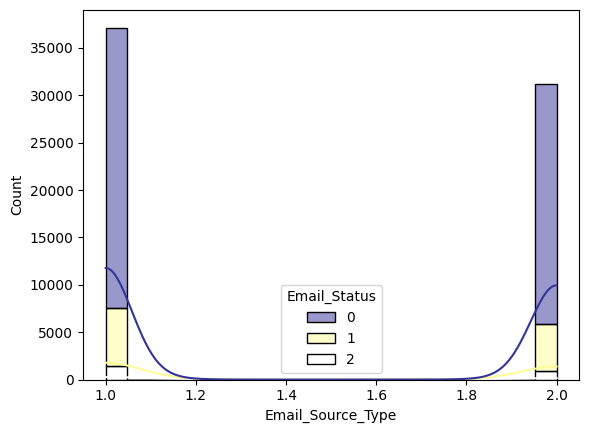

In [ ]:
sns.histplot(data=df, kde=True, x='Email_Source_Type', hue='Email_Status', multiple='stack',palette='terrain')

<Axes: xlabel='Customer_Location', ylabel='Count'>

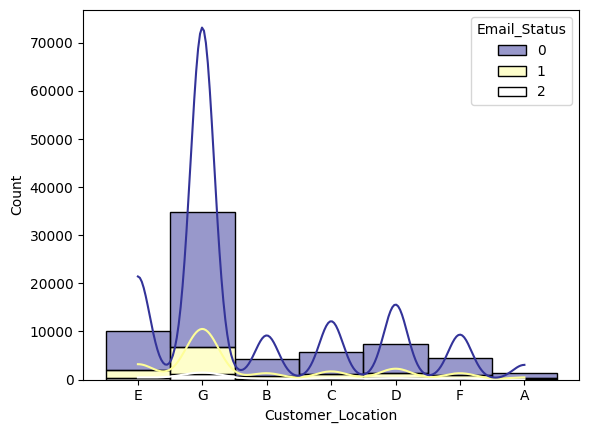

In [ ]:
sns.histplot(data=df, kde=True, x='Customer_Location', hue='Email_Status', multiple='stack',palette='terrain')

<Axes: xlabel='Email_Campaign_Type', ylabel='Count'>

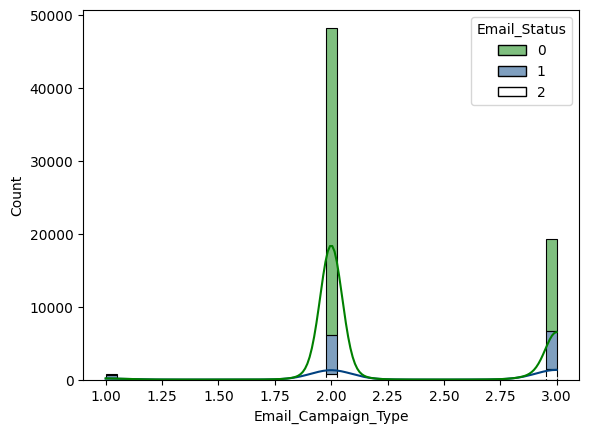

In [ ]:
sns.histplot(data=df, kde=True, x='Email_Campaign_Type', hue='Email_Status', multiple='stack',palette='ocean')

<Axes: xlabel='Total_Past_Communications', ylabel='Count'>

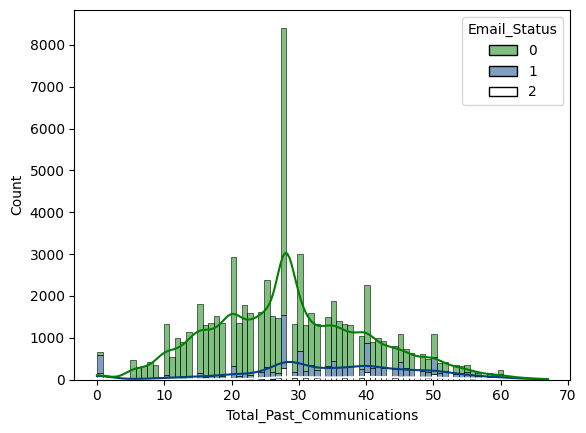

In [ ]:
sns.histplot(data=df, kde=True, x='Total_Past_Communications', hue='Email_Status', multiple='stack',palette='ocean')

<Axes: xlabel='Time_Email_sent_Category', ylabel='Count'>

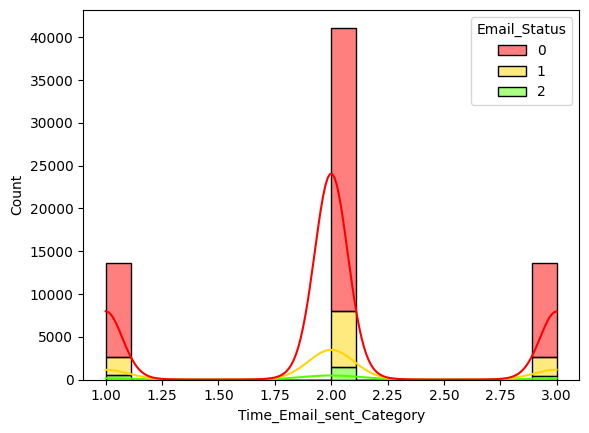

In [ ]:
sns.histplot(data=df, kde=True, x='Time_Email_sent_Category', hue='Email_Status', multiple='stack',palette='prism')

<Axes: xlabel='Word_Count', ylabel='Count'>

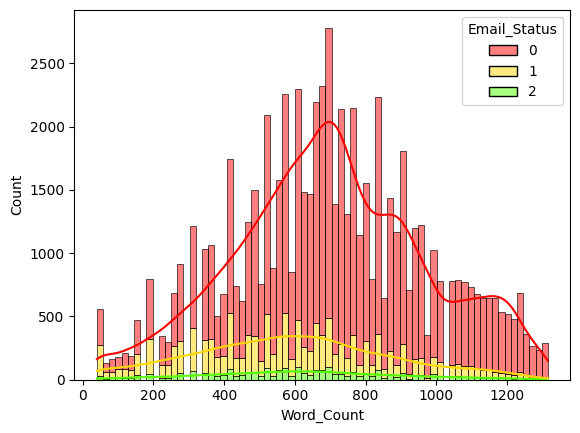

In [ ]:
sns.histplot(data=df, kde=True, x='Word_Count', hue='Email_Status', multiple='stack',palette='prism')

<Axes: xlabel='Total_Links', ylabel='Count'>

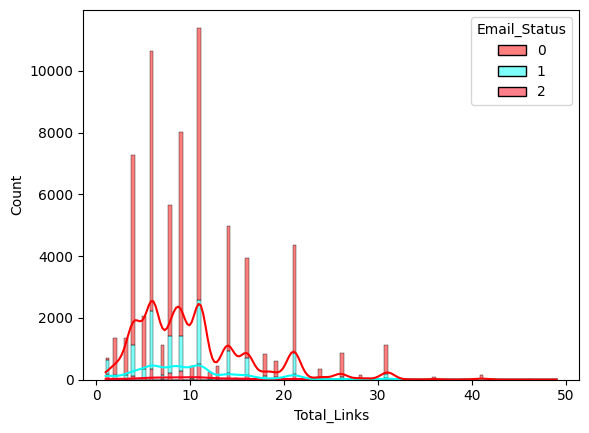

In [ ]:
sns.histplot(data=df, kde=True, x='Total_Links', hue='Email_Status', multiple='stack',palette='hsv')

<Axes: xlabel='Total_Images', ylabel='Count'>

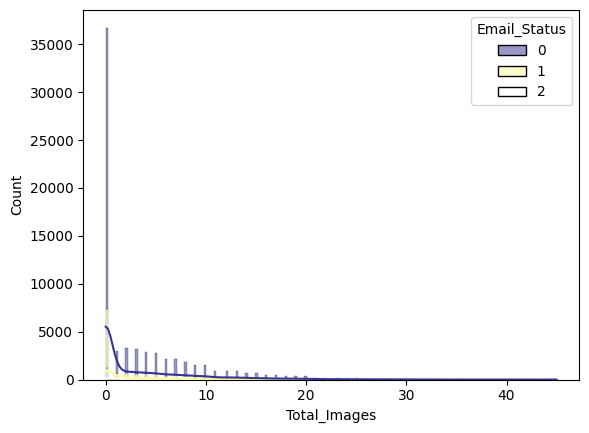

In [ ]:
sns.histplot(data=df, kde=True, x='Total_Images', hue='Email_Status', multiple='stack',palette='terrain')

#Correlation

In [ ]:
correlation = df[['Email_Campaign_Type', 'Email_Status']].corr()[['Email_Status']].sort_values(by='Email_Status', ascending=False)
#Memilih kolom Email_Campaign_Type dan Email_Status dari DataFrame df.
#.corr(): Menghitung matriks korelasi untuk kolom yang dipilih. Korelasi menunjukkan seberapa kuat hubungan antara dua variabel.
#[['Email_Status']]: Memilih kolom Email_Status dari matriks korelasi, menghasilkan DataFrame yang hanya berisi korelasi dengan Email_Status.
#.sort_values(by='Email_Status', ascending=False): Mengurutkan nilai korelasi berdasarkan kolom Email_Status dalam urutan menurun (descending).

print(correlation)

                     Email_Status
Email_Status              1.00000
Email_Campaign_Type       0.18551


In [ ]:
correlation = df[['Subject_Hotness_Score', 'Email_Status']].corr()[['Email_Status']].sort_values(by='Email_Status', ascending=False)
print(correlation)

                       Email_Status
Email_Status               1.000000
Subject_Hotness_Score     -0.146531


In [ ]:
correlation = df[['Email_Source_Type', 'Email_Status']].corr()[['Email_Status']].sort_values(by='Email_Status', ascending=False)
print(correlation)

                   Email_Status
Email_Status           1.000000
Email_Source_Type     -0.024527


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Menggunakan LabelEncoder untuk mengonversi Customer_Location menjadi numerik
le = LabelEncoder() #Membuat instance dari LabelEncoder
df['Customer_Location_Encoded'] = le.fit_transform(df['Customer_Location'])  #Menerapkan LabelEncoder pada kolom Customer_Location, yang mengonversi setiap kategori unik menjadi angka dengan Metode fit_transform pertama-tama akan "memelajari" kategori yang ada dalam kolom Customer_Location (proses fitting) dan kemudian mengonversinya menjadi nilai numerik (proses transforming). dan menyimpan dalam kolom baru yaitu df['Customer_Location_Encoded']

# Menghitung korelasi antara Customer_Location_Encoded dan Email_Status
correlation = df[['Customer_Location_Encoded', 'Email_Status']].corr()[['Email_Status']].sort_values(by='Email_Status', ascending=False)
print(correlation)


                           Email_Status
Email_Status                   1.000000
Customer_Location_Encoded      0.001459


In [ ]:
correlation = df[['Email_Campaign_Type', 'Email_Status']].corr()[['Email_Status']].sort_values(by='Email_Status', ascending=False)
print(correlation)

                     Email_Status
Email_Status              1.00000
Email_Campaign_Type       0.18551


In [ ]:
correlation = df[['Total_Past_Communications', 'Email_Status']].corr()[['Email_Status']].sort_values(by='Email_Status', ascending=False)
print(correlation)

                           Email_Status
Email_Status                   1.000000
Total_Past_Communications      0.233065


In [ ]:
correlation = df[['Word_Count', 'Email_Status']].corr()[['Email_Status']].sort_values(by='Email_Status', ascending=False)
print(correlation)

              Email_Status
Email_Status      1.000000
Word_Count       -0.171116


In [ ]:
correlation = df[['Total_Links', 'Email_Status']].corr()[['Email_Status']].sort_values(by='Email_Status', ascending=False)
print(correlation)

              Email_Status
Email_Status      1.000000
Total_Links      -0.027846


In [ ]:
correlation = df[['Total_Images', 'Email_Status']].corr()[['Email_Status']].sort_values(by='Email_Status', ascending=False)
print(correlation)

              Email_Status
Email_Status      1.000000
Total_Images     -0.017392


#Modelling data

##Logistc Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Mempersiapkan Fitur dan Target
features = [   #features: Daftar kolom yang digunakan sebagai fitur (predictors).
    'Subject_Hotness_Score',
    'Email_Source_Type',
    'Email_Campaign_Type',
    'Customer_Location',
    'Total_Past_Communications',
    'Word_Count',
    'Total_Links',
    'Total_Images'
]
X = df[features]
y = df['Email_Status'] #Series yang berisi target variabel Email_Status.

# memisahkan Fitur Kategorikal dan Numerik
categorical_features = [
    'Email_Source_Type',
    'Email_Campaign_Type',
    'Customer_Location'
]
numeric_features = [
    'Subject_Hotness_Score',
    'Total_Past_Communications',
    'Word_Count',
    'Total_Links',
    'Total_Images'
]

# Menggunakan OneHotEncoder untuk fitur kategorikal
preprocessor = ColumnTransformer(  #ColumnTransformer adalah alat untuk menerapkan transformasi yang berbeda pada subset kolom yang berbeda dalam DataFrame.berguna ketika memiliki kolom yang memerlukan berbagai jenis preprocessing (misalnya, numerik dan kategorikal).
    transformers=[ #daftar tuple yang menentukan bagaimana setiap subset kolom akan diubah
        ('num', 'passthrough', numeric_features),  #num': Nama transformasi untuk kolom numerik.'passthrough': Menginstruksikan ColumnTransformer untuk tidak menerapkan transformasi apa pun pada kolom yang ditentukan.numeric_features adalah variabel untuk menyimpan  daftar yang berisi nama-nama kolom dalam DataFrame yang berisi data numerik.
        ('cat', OneHotEncoder(), categorical_features) #cat': Nama transformasi untuk kolom kategorikal.OneHotEncoder(): Objek OneHotEncoder yang akan mengonversi kolom kategorikal menjadi representasi one-hot encoding.categorical_features: sebuah variabel Daftar kolom kategorikal yang akan dikenai one-hot encoding
    ])

# Membangun Pipeline dengan Preprocessing dan Logistic Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
]) #('preprocessor', preprocessor): Langkah pertama adalah preprocessor, yang merupakan objek ColumnTransformer yang sudah Anda definisikan sebelumnya. Ini menangani preprocessing data (seperti one-hot encoding untuk kolom kategorikal dan melewatkan kolom numerik tanpa perubahan).


# Membagi Data menjadi training dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#X: Fitur-fitur yang digunakan untuk melatih model.y: Target variabel yang ingin diprediksi.test_size=0.3: Menentukan proporsi data yang digunakan untuk set pengujian (30% dari total data).random_state=42: Menentukan seed acak untuk hasil yang dapat direproduksi.

# Melatih Model
pipeline.fit(X_train, y_train)

# Prediksi dan Evaluasi
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.98      0.89     16505
           1       0.46      0.11      0.17      3312
           2       0.00      0.00      0.00       689

    accuracy                           0.81     20506
   macro avg       0.43      0.36      0.36     20506
weighted avg       0.74      0.81      0.75     20506

Accuracy: 0.8075197503169804


##Random forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Mempersiapkan Fitur dan Target
features = [
    'Subject_Hotness_Score',
    'Email_Source_Type',
    'Email_Campaign_Type',
    'Customer_Location',
    'Total_Past_Communications',
    'Word_Count',
    'Total_Links',
    'Total_Images'
]
X = df[features]
y = df['Email_Status']

# Fitur Kategorikal dan Numerik
categorical_features = [
    'Email_Source_Type',
    'Email_Campaign_Type',
    'Customer_Location'
]
numeric_features = [
    'Subject_Hotness_Score',
    'Total_Past_Communications',
    'Word_Count',
    'Total_Links',
    'Total_Images'
]

# Menggunakan OneHotEncoder untuk fitur kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Membangun Pipeline dengan Preprocessing dan RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Membagi Data menjadi training dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Melatih Model
pipeline.fit(X_train, y_train)

# Prediksi dan Evaluasi
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.96      0.89     16505
           1       0.43      0.17      0.25      3312
           2       0.17      0.03      0.06       689

    accuracy                           0.80     20506
   macro avg       0.48      0.39      0.40     20506
weighted avg       0.75      0.80      0.76     20506

Accuracy: 0.8025455964108066


##instalasi shap value

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.0 MB/s eta 0:00:00


In [ ]:
import shap
print(shap.__version__)

0.46.0


              precision    recall  f1-score   support

           0       0.84      0.96      0.89     14856
           1       0.43      0.18      0.25      2946
           2       0.24      0.05      0.09       654

    accuracy                           0.80     18456
   macro avg       0.50      0.40      0.41     18456
weighted avg       0.75      0.80      0.76     18456

Accuracy: 0.8041829215431296


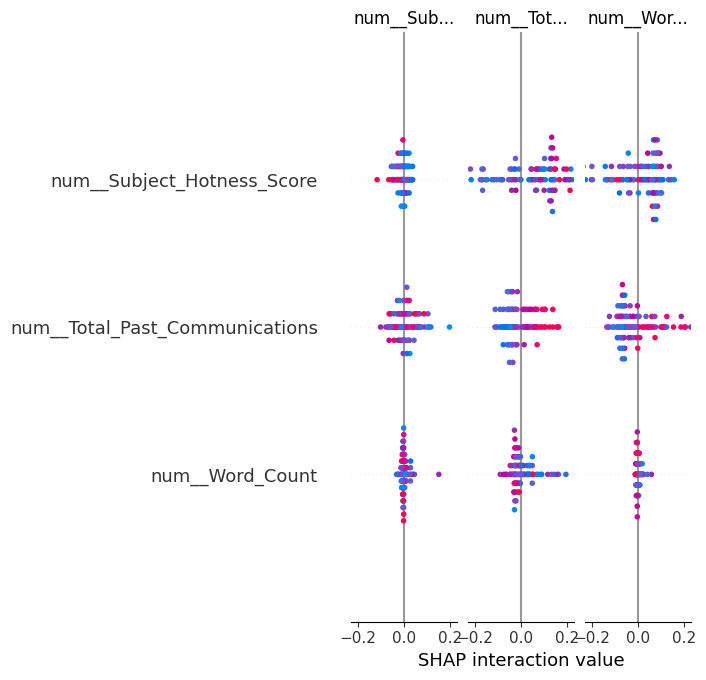

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import shap


# Mengisi nilai yang kosong dengan median
df.fillna(df.median(numeric_only=True), inplace=True)

# Mengganti outlier dengan nilai Q1 dan Q3
def replace_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].apply(lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x))
    return df

# Daftar kolom yang perlu diolah outliernya
columns_with_outliers = ['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count', 'Total_Links', 'Total_Images']

# Mengganti outlier di setiap kolom
for column in columns_with_outliers:
    df = replace_outliers(df, column)

# Mempersiapkan Fitur dan Target
features = [
    'Subject_Hotness_Score',
    'Email_Source_Type',
    'Email_Campaign_Type',
    'Customer_Location',
    'Total_Past_Communications',
    'Word_Count',
    'Total_Links',
    'Total_Images'
]
X = df[features]
y = df['Email_Status']

# Fitur Kategorikal dan Numerik
categorical_features = [
    'Email_Source_Type',
    'Email_Campaign_Type',
    'Customer_Location'
]
numeric_features = [
    'Subject_Hotness_Score',
    'Total_Past_Communications',
    'Word_Count',
    'Total_Links',
    'Total_Images'
]

# Menggunakan OneHotEncoder untuk fitur kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Membangun Pipeline dengan Preprocessing dan RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=50, random_state=42))
])

# Menggunakan subset data untuk pelatihan dan pengujian
X_subset, _, y_subset, _ = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.3, random_state=42)

# Melatih Model
pipeline.fit(X_train, y_train)

# Prediksi dan Evaluasi
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

# Menghitung SHAP values
preprocessor_model = pipeline.named_steps['preprocessor']  #preprocessor_model: Mengambil langkah preprocessing dari pipeline, yang meliputi transformasi data (seperti one-hot encoding untuk fitur kategorikal)
X_test_transformed = preprocessor_model.transform(X_test) #X_test_transformed: Menerapkan preprocessing yang sama pada data pengujian (X_test). Ini memastikan bahwa data pengujian berada dalam format yang sesuai untuk model.

# Menggunakan subset data untuk perhitungan SHAP values
X_test_subset = X_test_transformed[:100]  # X_test_subset: Mengambil subset dari data pengujian yang telah diproses. Hanya 100 contoh pertama yang digunakan untuk mempercepat perhitungan dan visualisasi SHAP values. Subset ini dipilih untuk efisiensi dan manajemen sumber daya, terutama jika dataset asli sangat besar.

# Membuat objek Explainer SHAP
model = pipeline.named_steps['classifier'] #Mengambil model klasifikasi dari pipeline, yaitu RandomForestClassifier.
explainer = shap.TreeExplainer(model) #Membuat objek TreeExplainer dari pustaka SHAP, yang digunakan untuk model berbasis pohon (seperti Random Forest). TreeExplainer menghitung nilai SHAP untuk setiap contoh dan fitur.
shap_values = explainer.shap_values(X_test_subset) #Menghitung nilai SHAP untuk subset data yang telah diproses. Nilai SHAP memberikan ukuran kontribusi setiap fitur terhadap prediksi model.

# Visualisasi SHAP values untuk semua fitur
shap.summary_plot(shap_values, X_test_subset, feature_names=preprocessor_model.get_feature_names_out())

#shap.summary_plot: Membuat plot ringkasan SHAP yang menunjukkan kontribusi setiap fitur terhadap prediksi model.
#shap_values: Nilai SHAP yang telah dihitung untuk subset data.
#X_test_subset: Data subset yang digunakan untuk menghitung nilai SHAP.
#feature_names: Nama fitur yang digunakan dalam visualisasi. preprocessor_model.get_feature_names_out() mengembalikan nama-nama fitur setelah preprocessing, yang memungkinkan visualisasi untuk mencocokkan fitur yang telah diubah.